In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
#Call up the documentation for the `norm` function imported above. What is the second listed method?"
#print(scipy.stats.norm._doc_)
#Q1
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  norm_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A normal continuous random variable.
 |  
 |  The location (``loc``) keyword specifies the mean.
 |  The scale (``scale``) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}
 |  
 |  for a real number :math:`x`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return MLEs for shape (if applicable), location,

In [3]:
It is the initializer method


SyntaxError: invalid syntax (<ipython-input-3-b7d76435092d>, line 1)

In [4]:
#Use the method that generates random variates to draw five samples from the standard normal distribution
# draw five samples here
#Q2
seed(47)
sample_5 = norm.rvs(size=5)
sample_5

array([-0.84800948,  1.30590636,  0.92420797,  0.6404118 , -1.05473698])

In [5]:
# What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.
#Q3
sample_5.mean()


0.19355593334131074

In [6]:
'''What is the standard deviation of these numbers? 
Calculate this manually here as $\\sqrt{\\frac{\\sum_i(x_i - \\bar{x})^2}{n}}$. 
Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports 
[broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)
'''
#Q4
np.sqrt(((sample_5-sample_5.mean())**2).sum()/len(sample_5))

0.9606195639478641

In [7]:
'''Here we have calculated the actual standard deviation of a small (size 5) data set. 
But in this case, this small data set is actually a sample from our larger (infinite) population. 
In this case, the population is infinite because we could keep drawing our normal random variates until our computers die. 
In general, the sample mean we calculate will not be equal to the population mean (as we saw above). 
A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. 
n other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. 
An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). 
Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. 
This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). 
The consequence of this is that the $n$ in the denominator is replaced by $n-1$.\n",
If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), 
thus $\\sqrt{\\frac{\\sum_i(x_i - \\bar{x})^2}{n-1}}$."
'''
#Q5
np.sqrt(((sample_5-sample_5.mean())**2).sum()/(len(sample_5)-1))


1.0740053227518152

In [8]:
'''Now use numpy's std function to calculate the standard deviation of our random samples. 
Which of the above standard deviations did it return?"'''
#Q6
sample_5.std()

0.9606195639478641

In [9]:
'''Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.'''
#Q7
sample_5.std(ddof=1)

1.0740053227518152

In [10]:
sample_5.std(ddof=1)==np.sqrt(((sample_5-sample_5.mean())**2).sum()/(len(sample_5)-1))

True

In [11]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

In [ ]:


'''
So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. The Central Limit Theorem (CLT) tells us that such a distribution will approach a normal distribution as $n$ increases. For the sampling distribution of the mean, the standard deviation of this distribution is given by
$$
\sigma_{mean} = \frac{\sigma}{\sqrt n}
$$
where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?

Let's give our normal distribution a little flavor. Also, for didactic purposes, the standard normal distribution, with its variance equal to its standard deviation of one, would not be a great illustration of a key point. Let us imagine we live in a town of 50000 people and we know the height of everyone in this town. We will have 50000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.
'''

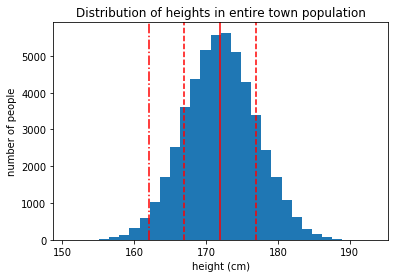

In [12]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172-10, color='r', linestyle='-.')

In [13]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

In [14]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

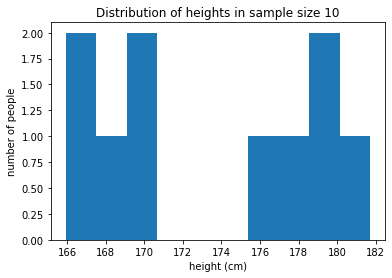

In [15]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

In [16]:
#The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean?"
np.mean(daily_sample1)

173.47911444163503

In [17]:
#sample2
daily_sample2 = townsfolk_sampler(10)
np.mean(daily_sample2)

173.7317666636263

In [18]:
#Q 
'''Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, 
and plot the resultant sampling distribution of the mean."
'''
seed(47)
daily_sample_means = np.array([np.mean(townsfolk_sampler(10)) for i in range(365)])
#daily_sample_means

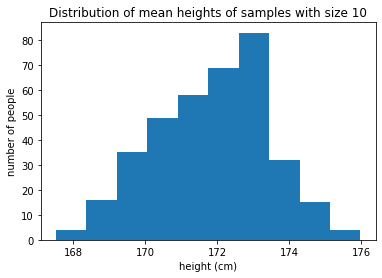

In [19]:
_ = plt.hist(daily_sample_means, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of mean heights of samples with size 10')

In [20]:
'''The above is the distribution of the means of samples of size 10 taken from our population. 
The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, 
and standard deviation will be $\\sigma / \\sqrt n$, which, in this case, should be approximately 1.58.'''
#__Q:__ Verify the above results from the CLT.
daily_sample_means.std(ddof=1)

1.5778333114768472

In [21]:

#__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT."
seed(47)
daily_sample_50_means = np.array([np.mean(townsfolk_sampler(50)) for i in range(365)])
 

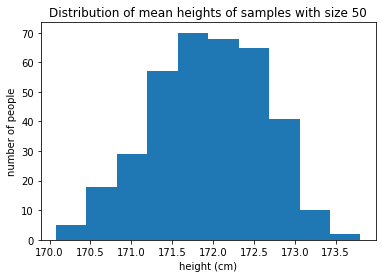

In [22]:
_ = plt.hist(daily_sample_50_means, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of mean heights of samples with size 50')

In [ ]:
Conclusion: "What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions.Furthermore, the larger the sample size, the narrower are those sampling distributions"

In [ ]:
III Normally testing times
All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but you still have to estimate them somehow. If we want to make inferences such as "is this observation unusual?" or "has my population mean changed?" then you need to have some idea of what the underlying distribution is so you can calculate relevant probabilities. In frequentist inference, you use the formulas above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.



In [23]:
#Q: Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.
 
1-(1-0.68)/2

0.8400000000000001

In [24]:
'''Calculating this probability involved calculating the area under the pdf from the value of 1 and below. To put it another way, we need to integrate the pdf. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above. One way to do this is using look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.'''

#Q: Use the cdf() function to answer the question above again and verify you get the same answer.
norm.cdf(1)

0.8413447460685429

In [25]:
#Q: Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.
norm(172, 5).cdf(177)    
    

0.8413447460685429

In [26]:
1 - (1 - 0.68) / 2

0.8400000000000001

In [27]:
#__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall?How surprised should we be at this result, given what we know about the population distribution?In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability."
1-norm(172, 5).cdf(200) 

1.0717590259723409e-08

In [ ]:
'''We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value. We have essentially just performed a z-test (albeit without having prespecified a threshold for our "level of surprise")!

We're about to come to a pinch, though here. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain.

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size. This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.'''

In [ ]:
#Q Let's now start from the position of knowing nothing about the heights of people in our town.

#Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
#Estimate the population mean using np.mean
#Estimate the population standard deviation using np.std (remember which denominator to use!)
#Calculate the (95%) margin of error (use the exact critial z value to 2 decimal places - look this up or use norm.ppf())
#Calculate the 95% Confidence Interval of the mean
#Does this interval include the true population mean?

In [28]:
seed(47)
samples = townsfolk_sampler(50)


In [29]:
mean_est = samples.mean()
mean_est

172.7815108576788

In [30]:
sd_est=samples.std(ddof=1)
sd_est

4.195424364433547

In [31]:
norm(mean_est, sd_est).ppf([0.025, 0.975])

array([164.5586302 , 181.00439151])

In [32]:
n = 50
norm(mean_est, sd_est / np.sqrt(n)).ppf([0.025, 0.975])

array([171.61861992, 173.94440179])

In [ ]:
The 95% Confidence Interval of the mean includes the true population mean

In [ ]:
#Q: Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?
We did not know the population parameters we simply used the sample statistics instead.    

In [33]:
#Q: Calculate the 95% confidence interval for the mean using the t distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this resource useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().
df = 49
critical_values = t(df).ppf([0.025, 0.975])
critical_values * sd_est / np.sqrt(n) + mean_est

array([171.58918445, 173.97383727])

In [ ]:
This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.